<a href="https://colab.research.google.com/github/michaelwnau/NLP-Notebooks/blob/main/sentiment_analysis_quadrants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sentiment Analysis using TextBlob and Visualization with Scatter Plot

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

In [ ]:
# Define the responses for each participant
responses = {
    "Participant 1": "I suggest integrating the content from the Portal into the app. I'd prefer information specific to my base instead of the entire organization. It's important for the app to provide useful information. I've noticed that smaller units, especially those in the dorms, often use Discord for communication.",
    "Participant 2": "I'd appreciate it if childcare information was more accessible. It would also be helpful to have the mission statement readily available in the app. Sometimes, as the spouse of a guardian and being a guardian myself, I feel like I'm just tagging along.",
    "Participant 3": "I'm generally satisfied with the application. However, instead of a generic news feed, I'd like to see a section dedicated to the most important or hot news.",
    "Participant 4": "It would be beneficial to have a workflow for guidance in the app. I find it challenging to obtain synchronous information from official channels. The absence of a repository to review older notes or information is a downside. Occasionally, I rely on Reddit to gather information. The Air Force Connect app isn't user-friendly when it comes to family and reliance information. I'd love to see a talent marketplace in the app. I've observed that younger Guardians often use Discord.",
    "Participant 5": "I wish the 'Guardian Spirit' feature was searchable in the app. For me, the news feed works fine, but I'd like to see news focused on space or local updates, maybe from sources like Fox News. I don't have children.",
    "Participant 6": "I frequently use Reddit. I want the app to highlight policy changes. It would be great if SSI, other documents, and uniform changes were easily searchable. Additionally, I'd love for the app to be optimized for recruiting purposes.",
    "Participant 7": "The app should be comprehensive and provide a straightforward approach to information access. Relocating PSD should be a seamless process through the app. I feel the load screen duration is excessive. The 'Guardian Ideal' should be prominently featured and easily accessible. I believe that all spouses are Guardians. Essentially, this application should cater to anyone who embraces the Guardian spirit.",
    "Participant 8": "If I wanted to access Facebook, I'd simply use its app. We already have the Air Force Connect app, so this app should differentiate itself by emphasizing the 'Guardian Ideal'. I'd also like to understand the organizational structure better. The load screen takes too long. One of the reasons I prefer apps like Amazon is the swift two-click ordering process."
}

In [ ]:
# Analyze sentiment for each response
sentiment_data = []
for participant, response in responses.items():
    analysis = TextBlob(response)
    sentiment_data.append([participant, analysis.sentiment.polarity, analysis.sentiment.subjectivity])

# Convert to DataFrame for better visualization
df_sentiment = pd.DataFrame(sentiment_data, columns=["Participant", "Polarity", "Subjectivity"])

df_sentiment

,Participant,Polarity,Subjectivity
0,Participant 1,-0.014286,0.607143
1,Participant 2,0.425000,0.425000
2,Participant 3,0.330000,0.670000
3,Participant 4,0.192361,0.343056
4,Participant 5,0.208333,0.250000
5,Participant 6,0.341667,0.571667
6,Participant 7,0.285714,0.592857
7,Participant 8,0.337500,0.564286


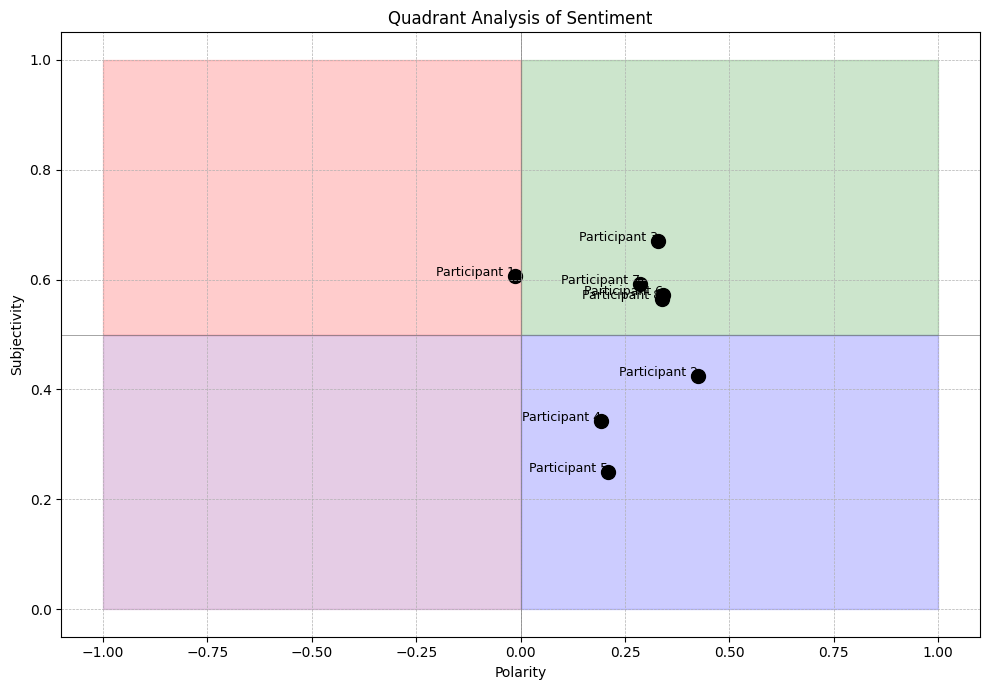

In [ ]:
# Plotting with colored quadrant backgrounds

plt.figure(figsize=(10, 7))
ax = plt.gca()

# Define the quadrant colors
colors = {
    "Q1": 'green',
    "Q2": 'red',
    "Q3": 'purple',
    "Q4": 'blue'
}

# Fill the quadrants with respective colors
ax.fill_between(x=[0, 1], y1=0.5, y2=1, color=colors['Q1'], alpha=0.2)
ax.fill_between(x=[-1, 0], y1=0.5, y2=1, color=colors['Q2'], alpha=0.2)
ax.fill_between(x=[-1, 0], y1=0, y2=0.5, color=colors['Q3'], alpha=0.2)
ax.fill_between(x=[0, 1], y1=0, y2=0.5, color=colors['Q4'], alpha=0.2)

# Scatter plot using the data from df_sentiment
plt.scatter(df_sentiment['Polarity'], df_sentiment['Subjectivity'], color='black', s=100)  # using black for points for contrast

# Draw dividing lines for the quadrants
plt.axhline(0.5, color='grey', linewidth=0.5)
plt.axvline(0, color='grey', linewidth=0.5)

# Title and labels
plt.title("Quadrant Analysis of Sentiment")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Annotate the points with participant number
for i, participant in enumerate(df_sentiment['Participant']):
    plt.annotate(participant, (df_sentiment['Polarity'].iloc[i], df_sentiment['Subjectivity'].iloc[i]), fontsize=9, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
'''
## Key:
Green (Top-right): Positive Polarity & High Subjectivity
Red (Top-left): Negative Polarity & High Subjectivity
Purple (Bottom-left): Negative Polarity & Low Subjectivity
Blue (Bottom-right): Positive Polarity & Low Subjectivity

'''

In [ ]:
'''
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
© 2023, Michael Nau

All rights reserved. No part of this notebook may be reproduced or used in any manner without the written
permission of the publisher, except for brief quotations in critical reviews and articles.

For more information, contact michaelwnau@gmail.com.

Notebook created with Google Colab.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Note: The responses used here ("responses") are an original synthesis based on Sam Vang's original notes from "Research Notes from AFA Conference"
(https://docs.google.com/document/d/18xlcBuXv8MyEc-KneW4ynFnrkk_pwq80ZGotsctN6n4/edit).


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

This notebook uses TextBlob, an open-source natural language processing library, to perform sentiment analysis.


'''
